# Lesson 3. Encoding the Board.

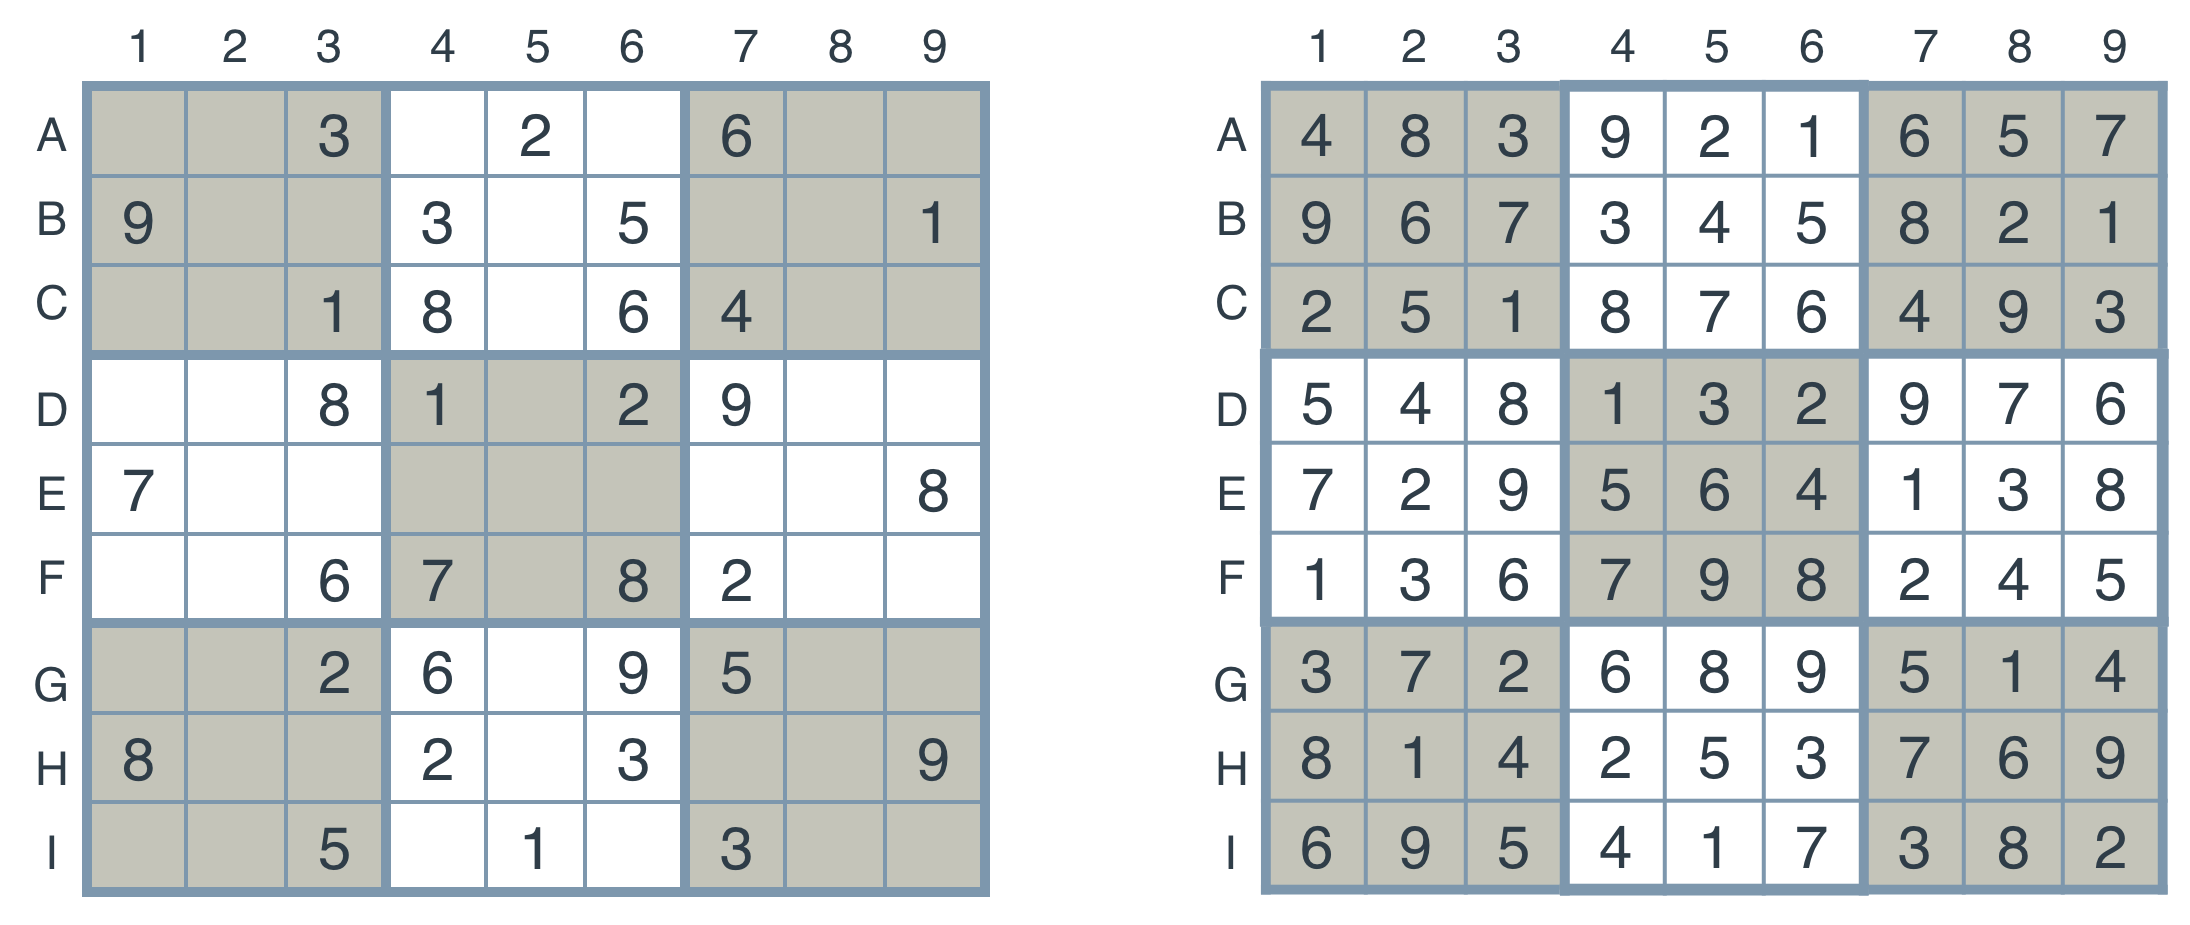

In [139]:
from IPython.core.display import Image, display
display(Image(r'...\Images\labels.png'))

Now, in order to implement an agent, let's start by coding the board in Python. Then, we'll code the necessary functions to solve the Sudoku. We'll record the puzzles in two ways — as a string and as a dictionary.

The string will consist of a concatenation of all the readings of the digits in the rows, taking the rows from top to bottom. If the puzzle is not solved, we can use a . as a placeholder for an empty box.

For example, the unsolved puzzle at the above left will be written as: <i>..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..</i>

And the solved puzzle at the above right, will be recorded as: <i>483921657967345821251876493548132976729564138136798245372689514814253769695417382</i>

We'll implement the dictionary as follows. The keys will be strings corresponding to the boxes — namely, 'A1', 'A2', ..., 'I9'. The values will either be the digit in each box (if there is one) or a '.' (if not).

So, let's get started. First, we'll record rows and columns as strings.

In [8]:
rows = 'ABCDEFGHI'
cols = '123456789'

In [9]:
def cross(a, b):
    return [s+t for s in a for t in b]

In [10]:
boxes = cross(rows, cols)
print(boxes)
len(boxes)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']


81

In [11]:
boxes[0]

'A1'

In [12]:
# Units
row_units = [cross(r,cols) for r in rows]
col_units = [cross(rows,c) for c in cols]
square_units = [cross(rs,cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
unitlist = row_units +  col_units + square_units
units = dict((s, [u for u in unitlist if s in u]) for s in boxes)
units.get('A1')

[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
 ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]

In [13]:
# Peers
peers = dict((s, set(sum(units[s],[]))-set([s])) for s in boxes)
peers.get('A1')

{'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'B1',
 'B2',
 'B3',
 'C1',
 'C2',
 'C3',
 'D1',
 'E1',
 'F1',
 'G1',
 'H1',
 'I1'}

Now, we're ready to turn the string representation of a sudoku into a dictionary representation. That'll be your turn to shine!

Implement grid_values()
A function to convert the string representation of a puzzle into a dictionary form.
Recall that for the string:

<b>'..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'</b>

...we'd like to return the dictionary:

    {
      'A1': '.'
      'A2': '.',
      'A3': '3',
      'A4': '.',
      'A5': '2',
      ...
      'I9': '.'
    }
    
Implement a function called grid_values() that performs this task.



In [14]:
grid = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
#grid_values(grid)
lst = list(enumerate(grid))
lst[0][1]
lst[2][1]

'3'

In [15]:
ind = list(enumerate(boxes))
ind[0][1]
ind[2][1]

'A3'

In [16]:
val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
print(val)

{'A1': '.', 'A2': '.', 'A3': '3', 'A4': '.', 'A5': '2', 'A6': '.', 'A7': '6', 'A8': '.', 'A9': '.', 'B1': '9', 'B2': '.', 'B3': '.', 'B4': '3', 'B5': '.', 'B6': '5', 'B7': '.', 'B8': '.', 'B9': '1', 'C1': '.', 'C2': '.', 'C3': '1', 'C4': '8', 'C5': '.', 'C6': '6', 'C7': '4', 'C8': '.', 'C9': '.', 'D1': '.', 'D2': '.', 'D3': '8', 'D4': '1', 'D5': '.', 'D6': '2', 'D7': '9', 'D8': '.', 'D9': '.', 'E1': '7', 'E2': '.', 'E3': '.', 'E4': '.', 'E5': '.', 'E6': '.', 'E7': '.', 'E8': '.', 'E9': '8', 'F1': '.', 'F2': '.', 'F3': '6', 'F4': '7', 'F5': '.', 'F6': '8', 'F7': '2', 'F8': '.', 'F9': '.', 'G1': '.', 'G2': '.', 'G3': '2', 'G4': '6', 'G5': '.', 'G6': '9', 'G7': '5', 'G8': '.', 'G9': '.', 'H1': '8', 'H2': '.', 'H3': '.', 'H4': '2', 'H5': '.', 'H6': '3', 'H7': '.', 'H8': '.', 'H9': '9', 'I1': '.', 'I2': '.', 'I3': '5', 'I4': '.', 'I5': '1', 'I6': '.', 'I7': '3', 'I8': '.', 'I9': '.'}


In [17]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    lst = list(enumerate(grid))
    ind = list(enumerate(boxes))
    val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
    return val

In [18]:
def display_table(values):
    """
    Display the values as a 2-D grid.
    Input: The sudoku in dictionary form
    Output: None
    """
    width = 1 + max(len(values[s]) for s in boxes)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(''.join(values[r+c].center(width)+('|' if c in '36' else '')
                      for c in cols))
        if r in 'CF': print(line)
    return

In [19]:
values = grid_values(grid)
display_table(values)

. . 3 |. 2 . |6 . . 
9 . . |3 . 5 |. . 1 
. . 1 |8 . 6 |4 . . 
------+------+------
. . 8 |1 . 2 |9 . . 
7 . . |. . . |. . 8 
. . 6 |7 . 8 |2 . . 
------+------+------
. . 2 |6 . 9 |5 . . 
8 . . |2 . 3 |. . 9 
. . 5 |. 1 . |3 . . 


The Udacity solution of the function:

In [20]:
def ud_grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    assert len(grid) == 81, "Input grid must be a string of length 81 (9x9)"
    return dict(zip(boxes, grid))

<b>zip(*iterables)</b>
Make an iterator that aggregates elements from each of the iterables.

Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. With no arguments, it returns an empty iterator. 

The left-to-right evaluation order of the iterables is guaranteed. This makes possible an idiom for clustering a data series into n-length groups using zip(*[iter(s)]*n).

zip() should only be used with unequal length inputs when you don’t care about trailing, unmatched values from the longer iterables. If those values are important, use itertools.zip_longest() instead.

zip() in conjunction with the * operator can be used to unzip a list:

    >> x = [1, 2, 3]
    >> y = [4, 5, 6]
    >> zipped = zip(x, y)
    >> list(zipped)
    [(1, 4), (2, 5), (3, 6)]
    >> x2, y2 = zip(*zip(x, y))
    >> x == list(x2) and y == list(y2)
    True

Insight: We can eliminate possible values for a box by looking at its peers
Ok, time to start solving the Sudoku!

First things first, let's look at a box and analyze the values that could go in there.

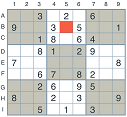

In [153]:
display(Image(r'...\Images\reduce-values.png'))

The possible values are 4 and 7. What did we do to figure this out? Well, all the other values already appear either in the same column, row, or 3x3 square of the highlighted box, so we conclude that they can't be a value for this box. In other words, we used the following strategy.

# Lesson 5. Strategy 1: Elimination.

<b>If a box has a value assigned, then none of the peers of this box can have this value.</b>


Now that we know how to eliminate values, we can take one pass, go over every box that has a value, and eliminate the values that can't appear on the box, based on its peers. Once we do so, the board looks like this (for clarity, we've highlighted the original filled-in boxes in bold lettering):

(Notice that if we take a second pass through the puzzle, we can gain even more information, but this is not necessary for now.)

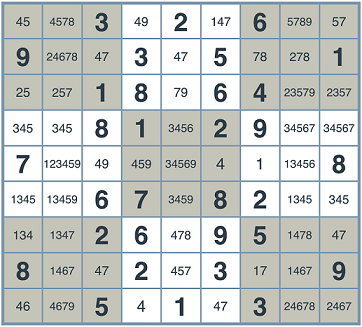

In [154]:
display(Image(r'...\Images\values-easy.png'))

<b>Improved <i>grid_values()</i></b>

As of now, we are recording the puzzles in dictionary form, where the keys are the boxes ('A1', 'A2', ... , 'I9') and the values are either the value for each box (if a value exists) or '.' (if the box has no value assigned yet). What we really want is for each value to represent all the available values for that box. For example, the box in the second row and fifth column above will have key 'B5' and value '47' (because 4 and 7 are the only possible values for it). The starting value for every empty box will thus be '123456789'.

Update the grid_values() function to return '123456789' instead of '.' for empty boxes.

In [21]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    lst = list(enumerate(grid))
    ind = list(enumerate(boxes))
    num = '123456789'
    for i in range(len(lst)):
        if lst[i][1] == '.':
            lst[i] = (i,num)
    val = dict((k[1], [v[1] for v in lst][k[0]]) for k in ind)
    return val

In [22]:
# The Udacity solution:
def ud_grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '123456789' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '123456789' if it is empty.
    """
    values = []
    all_digits = '123456789'
    for c in grid:
        if c == '.':
            values.append(all_digits)
        elif c in all_digits:
            values.append(c)
    assert len(values) == 81
    return dict(zip(boxes, values))

In [23]:
values = grid_values(grid)
display_table(values)

123456789 123456789     3     |123456789     2     123456789 |    6     123456789 123456789 
    9     123456789 123456789 |    3     123456789     5     |123456789 123456789     1     
123456789 123456789     1     |    8     123456789     6     |    4     123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789     8     |    1     123456789     2     |    9     123456789 123456789 
    7     123456789 123456789 |123456789 123456789 123456789 |123456789 123456789     8     
123456789 123456789     6     |    7     123456789     8     |    2     123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789     2     |    6     123456789     9     |    5     123456789 123456789 
    8     123456789 123456789 |    2     123456789     3     |123456789 123456789     9     
123456789 123456789     5     |123456789     1     123456789 |    3   

<b>Implement <i>eliminate()</i></b>


Now, let's finish the code for the function eliminate(), which will take as input a puzzle in dictionary form. The function will iterate over all the boxes in the puzzle that only have one value assigned to them, and it will remove this value from every one of its peers.

In [24]:
print(peers['A1'])
type(peers)
type(peers['A1'])

{'C1', 'B3', 'E1', 'C2', 'A5', 'B2', 'A4', 'A3', 'G1', 'D1', 'A2', 'I1', 'C3', 'A8', 'A9', 'A6', 'B1', 'A7', 'F1', 'H1'}


set

In [25]:
def eliminate(values):
    """Eliminate values from peers of each box with a single value.

    Go through all the boxes, and whenever there is a box with a single value,
    eliminate this value from the set of values of all its peers.

    Args:
        values: Sudoku in dictionary form.
    Returns:
        Resulting Sudoku in dictionary form after eliminating values.
    """
    solved_values = [box for box in values.keys() if len(values[box]) == 1]
#    print(solved_values)
    
    for box in solved_values:
        digit = values[box]
        for peer in peers[box]:
            values[peer] = values[peer].replace(digit,'')
    
    return values
display_table(eliminate(values))

   45    4578    3   |   49     2     147  |   6     5789    57  
   9    24678    47  |   3      47     5   |   78    278     1   
   25    257     1   |   8      79     6   |   4    23579   2357 
---------------------+---------------------+---------------------
  345    345     8   |   1     3456    2   |   9    34567  34567 
   7    123459   49  |  459   34569    4   |   1    13456    8   
  1345  13459    6   |   7     3459    8   |   2     1345   345  
---------------------+---------------------+---------------------
  134    1347    2   |   6     478     9   |   5     1478    47  
   8     1467    47  |   2     457     3   |   17    1467    9   
   46    4679    5   |   4      1      47  |   3    24678   2467 


Let's actually look more carefully at the top 3x3 square in the center, highlighted in red.

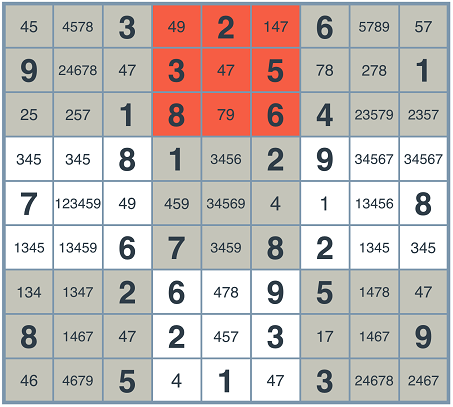

In [160]:
display(Image(r'...\Images\highlighted-unit.png'))

# Lesson 6. Strategy 2: Only Choice.

<b>If there is only one box in a unit which would allow a certain digit, then that box must be assigned that digit.</b>

Time to code it! In the next quiz, finish the code for the function only_choice, which will take as input a puzzle in dictionary form. The function will go through all the units, and if there is a unit with a digit that only fits in one possible box, it will assign that digit to that box.

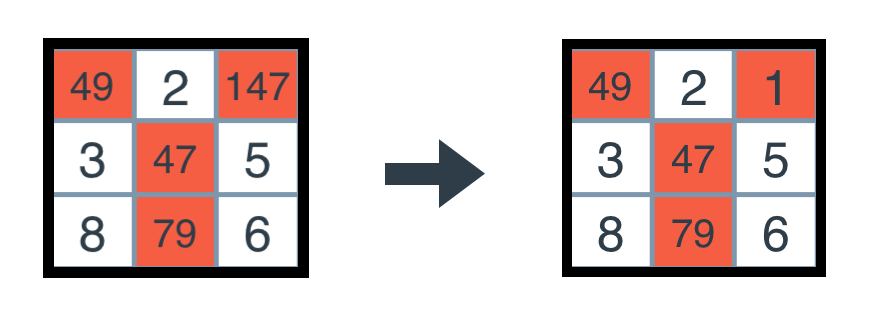

In [161]:
display(Image(r'...\Images\only-choice.png'))

In [26]:
def only_choice(values):
    """Finalize all values that are the only choice for a unit.

    Go through all the units, and whenever there is a unit with a value
    that only fits in one box, assign the value to this box.

    Input: Sudoku in dictionary form.
    Output: Resulting Sudoku in dictionary form after filling in only choices.
    """
    for unit in unitlist:
#        print('\ncurrent unit \t- {}'.format(unit))
        for digit in '123456789':
#            print('current digit \t- {}'.format(digit))
            dplaces = [box for box in unit if digit in values[box]]
#            print('dplaces in unit \t- {}'.format(dplaces))
#            print('\n')
            if len(dplaces) == 1:
                values[dplaces[0]] = digit
    return values
values = only_choice(values)

In [27]:
display_table(values)

  45    8     3   |  9     2     1   |  6    5789   57  
  9     6     47  |  3     4     5   |  8    278    1   
  2    257    1   |  8     7     6   |  4   23579  2357 
------------------+------------------+------------------
 345   345    8   |  1    3456   2   |  9   34567 34567 
  7     2     9   |  5   34569   4   |  1   13456   8   
 1345 13459   6   |  7    3459   8   |  2    1345  345  
------------------+------------------+------------------
 134   1347   2   |  6     8     9   |  5    1478   47  
  8    1467   47  |  2     5     3   |  17    6     9   
  6     9     5   |  4     1     7   |  3     8     2   


# Lesson 7. Constraint Propagation.

If you've made it this far, you've already gained hands on exposure to a powerful technique in AI - Constraint Propagation. Constraint Propagation is all about using local constraints in a space (in the case of Sudoku, the constraints of each square) to dramatically reduce the search space. As we enforce each constraint, we see how it introduces new constraints for other parts of the board that can help us further reduce the number of possibilities. We have an entire lesson devoted to Constraint Propagation but let's quickly see some other famous AI problems it helps us solve.

### Map Coloring

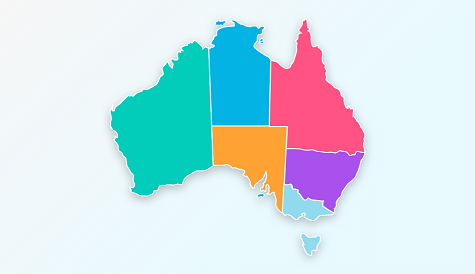

In [164]:
display(Image(r'...\Images\map-coloring.png'))

In the map coloring problem, we must find a way to color the map such that no two adjacent items share the same color. Indeed, we'll see how we use constraint propagation to use this simple constraint to find a solution just as we use such constraints to solve Sudoku.

### Crypto-Arithmetic Puzzles

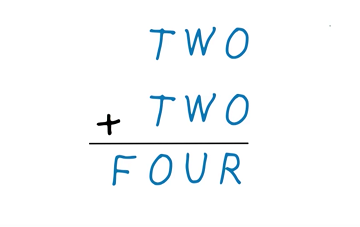

In [165]:
display(Image(r'...\Images\screen-shot-2017-01-22-at-12.20.03-pm.png'))

In the above, what digits do T, W, O, F, U, and R represent?

In Crypto-Arithmetic puzzles, each letter represents a digit, and no two letters represent the same digit. None of the numbers start with a leading zero. Our goal is to find a mapping from letters to digits that satisfies the equations. Here again, we'll find that the constraints imposed by the equation allow us to create an intelligent algorithm to solve the problem via Constraint Propagation.

## Applying Constraint Propagation to Sudoku

Now that you see how we apply Constraint Propagation to this problem, let's try to code it! In the following quiz, combine the functions <b>eliminate</b> and <b>only_choice</b> to write the function <b>reduce_puzzle</b>, which receives as input an unsolved puzzle and applies our two constraints repeatedly in an attempt to solve it.

Some things to watch out for:

- The function needs to stop if the puzzle gets solved. How to do this?
- What if the function doesn't solve the sudoku? Can we make sure the function quits when applying the two strategies stops making progress?

In [28]:
values.keys()

dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9'])

In [29]:
def reduce_puzzle(values):
    stalled = False
    while not stalled:
        # Check how many boxes have a determined value
        solved_values_before = len([box for box in values.keys() if len(values[box]) == 1])

        # Your code here: Use the Eliminate Strategy
        values = eliminate(values)
        # Your code here: Use the Only Choice Strategy
        values = only_choice(values)
        # Check how many boxes have a determined value, to compare
        solved_values_after = len([box for box in values.keys() if len(values[box]) == 1])
        # If no new values were added, stop the loop.
        stalled = solved_values_before == solved_values_after
        # Sanity check, return False if there is a box with zero available values:
        if len([box for box in values.keys() if len(values[box]) == 0]):
            return False
    return values
if reduce_puzzle(values) == False:
    print("Caution! No changes have been done!!!\n")
else:
    display_table(reduce_puzzle(values))

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 


## Lesson 8. Harder Sudoku.

In [30]:
grid2 = '4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'

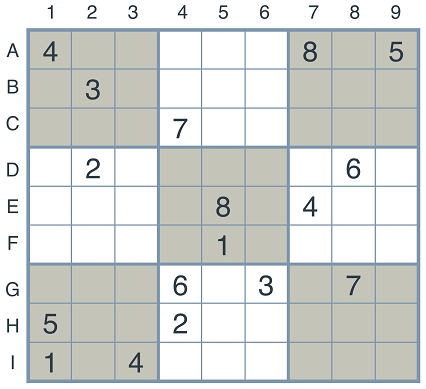

In [169]:
display(Image(r'...\Images\harder-puzzle.png'))

In [31]:
values = grid_values(grid2)
display_table(values)

    4     123456789 123456789 |123456789 123456789 123456789 |    8     123456789     5     
123456789     3     123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 
123456789 123456789 123456789 |    7     123456789 123456789 |123456789 123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789     2     123456789 |123456789 123456789 123456789 |123456789     6     123456789 
123456789 123456789 123456789 |123456789     8     123456789 |    4     123456789 123456789 
123456789 123456789 123456789 |123456789     1     123456789 |123456789 123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789 123456789 |    6     123456789     3     |123456789     7     123456789 
    5     123456789 123456789 |    2     123456789 123456789 |123456789 123456789 123456789 
    1     123456789     4     |123456789 123456789 123456789 |12345678

In [32]:
values = eliminate(values)
display_table(values)

   4      1679   12679  |  139     2369    1269  |   8      1239     5    
 26789     3    1256789 | 14589   24569  1245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569 1245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     135789 |  3459   34579    4579  | 13579     6     13789  
  3679   15679   135679 |  359      8     25679  |   4     12359   12379  
 36789   456789  356789 |  3459     1     245679 | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789   36789  |   2      479    14789  |  1369   13489   134689 
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


In [33]:
values = only_choice(values)
display_table(values)

   4      1679   12679  |  139     2369    1269  |   8      1239     5    
 26789     3    1256789 | 14589   24569  1245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569 1245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     135789 |  3459   34579    4579  | 13579     6     13789  
  3679   15679   135679 |  359      8     25679  |   4     12359   12379  
 36789     4     356789 |  3459     1     245679 | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |  1369   13489   134689 
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


In [34]:
display_table(reduce_puzzle(values))

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


Oh no! The algorithm didn't solve it. It seemed to reduce every box to a number of possibilites, but it won't go farther than that. We need to think of other ways to improve our solution.

# Lesson 9. Strategy 3: Search

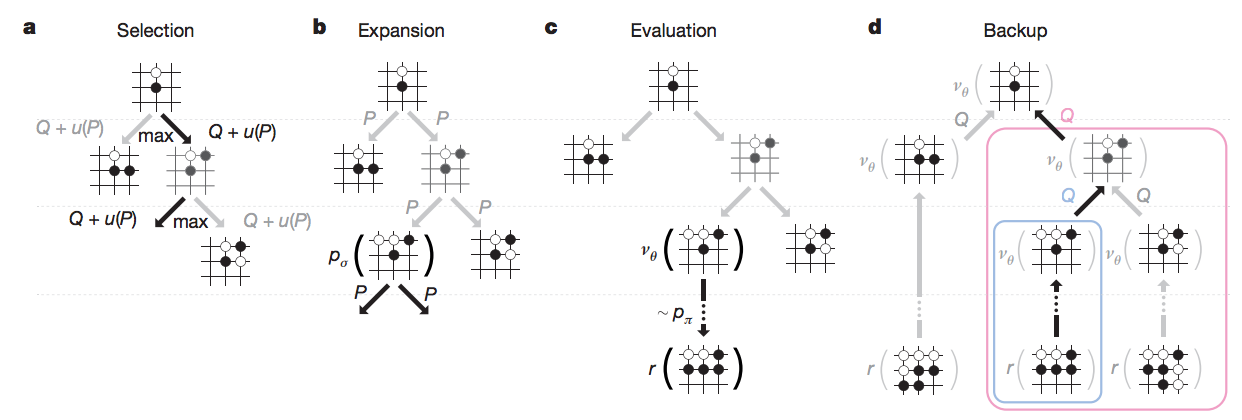

In [174]:
display(Image(r'...\Images\screen-shot-2017-01-22-at-11.08.01-pm-1.png'))

An example of Search being used in Google's AlphaGo paper https://storage.googleapis.com/deepmind-media/alphago/AlphaGoNaturePaper.pdf

We're now going to use another foundational AI technique to help us solve this problem: Search.

Search is used throughout AI from Game-Playing to Route Planning to efficiently find solutions.

Here's how we'll apply it. The box 'A2' has four possibilities: 1, 6, 7, and 9. Why don't we fill it in with a 1 and try to solve our puzzle. If we can't solve it, we'll try with a 6, then with a 7, and then with a 9. Sure, it's four times as much work, but each one of the cases becomes easier.

Actually, there's something a bit smarter than that. Looking carefully at the puzzle, is there a better choice for a box than 'A2'?

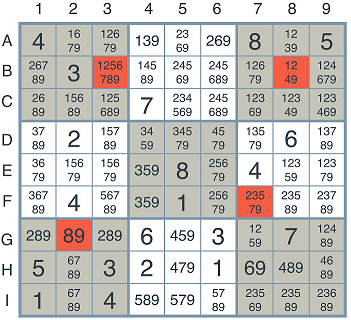

In [175]:
display(Image(r'...\Images\choices.png'))

That's right - we pick G2 because it has the fewest numbers to try out.
So it seems that we have a new strategy!

## Strategy 3: Search

<b>Pick a box with a minimal number of possible values. Try to solve each of the puzzles obtained by choosing each of these values, recursively.</b>

Before we dive in to code the search function, let's first check our understanding. How would you traverse the following tree using Depth First Search?

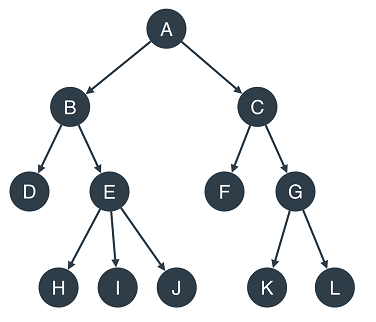

In [176]:
display(Image(r'...\Images\bfs-quiz.png'))

DFS Quiz


Traverse the above tree using Depth First Search. The answer should be the string obtained by the labels in the order you've traversed the tree. For example, if your tree has four vertices, A, B, C, D, and you've traversed them in the order B->C->A->D, then the answer should be the string 'BCAD'.

Answer ABDEHIJCFGKL

# Lesson 10. Coding the Solution.

In [35]:
display_table(values)

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


In [36]:
display_table(reduce_puzzle(values))

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


In [37]:
values['G2']

'89'

Iwould like to add that in this particular problem `sum` is used to flatten a list. `units[s]` is actually going to return a list of lists such as 
<b>`[['A1', 'A2', ... 'A9'], ['A1', 'B1', ... 'I9'], ['G7', 'G8', ... 'I9']]`</b>

This is the case of <b>`units['A1']`</b>. 

Now, <b>`sum(units['A1'], [])`</b> would 'flatten' this list

Here's a small example
<i>sum( [ ['a', 'b', 'c'], ['d', 'e', 'f'] ], [ ] ) = ['a', 'b', 'c', 'd', 'e', 'f']</i>


Note, however
<i>sum( [ ['a', ['b', 'c'] ], ['d', 'e', 'f'] ] ) = ['a', ['b', 'c'], 'd', 'e', 'f']</i>


Also the <b>sum()</b> function is defined as <b>sum(iterable, start=0)</b>. Think of it like this

<i>sum( [1, 2, 3, 4] ) = 0 + 1 + 2 + 3 + 4

sum( [1, 2, 3, 4], 10) = 10 + 1 + 2 + 3 + 4
</i>

That makes sense for numbers, but what about for lists? Well, here it is

<i>sum( [ ['a', 'b', 'c'], ['d', 'e', 'f'] ], [ ]) = [ ] + ['a', 'b', 'c'] + ['d', 'e', 'f']</i>


Hope this makes sense. Chose to write a lengthier reply since this was something I struggled a lot with and it might help.

In [38]:
def search(values):
    "Using depth-first search and propagation, try all possible values."
    # First, reduce the puzzle using the previous function
    values = reduce_puzzle(values)
    if values is False:
        return False ## Failed earlier
    if all(len(values[s]) == 1 for s in boxes): 
        return values ## Solved!
    # Choose one of the unfilled squares with the fewest possibilities
    n,s = min((len(values[s]), s) for s in boxes if len(values[s]) > 1)
    #print('n - {},  s - {}, values_s - {}'.format(n,s,values[s]))
    # Now use recurrence to solve each one of the resulting sudokus, and 
    for value in values[s]:
        new_sudoku = values.copy()
        new_sudoku[s] = value
        attempt = search(new_sudoku)
        if attempt:
            return attempt

display_table(search(values))

4 1 7 |3 6 9 |8 2 5 
6 3 2 |1 5 8 |9 4 7 
9 5 8 |7 2 4 |3 1 6 
------+------+------
8 2 5 |4 3 7 |1 6 9 
7 9 1 |5 8 6 |4 3 2 
3 4 6 |9 1 2 |7 5 8 
------+------+------
2 8 9 |6 4 3 |5 7 1 
5 7 3 |2 9 1 |6 8 4 
1 6 4 |8 7 5 |2 9 3 


# Lesson 11. Project Introduction.

Congratulations on making it all the way through! You now have a program that can solve any Sudoku puzzle! But can you extend your solution to include more heuristics? How about to solve a modified version of the puzzle?

For this project, you will implement some extensions to the Sudoku algorithm developed in the lectures. The first extension will be an implementation of the naked twins technique. The second will be a modification of the algorithm to solve a diagonal sudoku.

Navigate to the next page for details on how to get started and submit.

## Naked Twins

The naked twins technique is the following. Consider the following puzzle, and look at the two highlighted boxes, 'F3' and 'I3'.

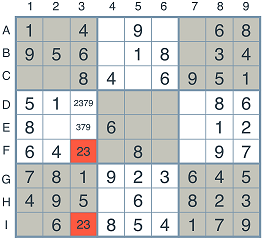

In [181]:
display(Image(r'...\Images\naked-twins.png'))

As we can see, both belong to the same column, and both permit the values of 2 and 3. Now, we don't know which one has a 2 and which one has a 3, but we know one thing for sure — the values 2 and 3 are locked in those two boxes, so no other box in their same unit (the third column) can contain the values 2 or 3.

Thus, we go over all the boxes in their same unit, and remove the values 2 and 3 from their possible values

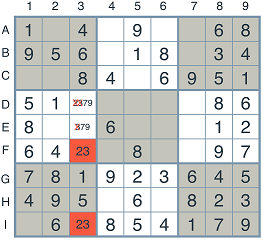

In [182]:
display(Image(r'...\Images\naked-twins-2.png'))

As you can see, we've removed the values 2 and 3 from the boxes 'D3' and 'E3'. This is the naked twins technique. In this project, you'll write a function that implements this technique.

## Diagonal Sudoku

A diagonal sudoku is like a regular sudoku, except that among the two main diagonals, the numbers 1 to 9 should all appear exactly once. In this project, you'll modify the functions we've written in the lecture (or you can write your own!) in order to solve every diagonal sudoku.

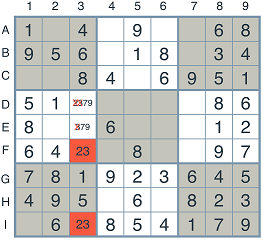

In [183]:
display(Image(r'...\Images\naked-twins-2.png'))

# Lesson 12. Project Solve a Sudoku with AI.

## Overview

In this project, you will be writing code to implement two extensions of our sudoku solver. The first one will be to implement the technique called "naked twins". The second one will be to modify our existing code to solve a <b>diagonal</b> sudoku. To complete this project you will use the tools you learned about in the lesson, and build upon them.

Your goals are to implement the naked twins function, and write an AI agent that will solve the Diagonal Sudoku game.

In [39]:
grid3 = '9.1....8.8.5.7..4.2.4....6...7......5..............83.3..6......9................'

In [40]:
values = grid_values(grid3)
display_table(values)

    9     123456789     1     |123456789 123456789 123456789 |123456789     8     123456789 
    8     123456789     5     |123456789     7     123456789 |123456789     4     123456789 
    2     123456789     4     |123456789 123456789 123456789 |123456789     6     123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789     7     |123456789 123456789 123456789 |123456789 123456789 123456789 
    5     123456789 123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 
123456789 123456789 123456789 |123456789 123456789 123456789 |    8         3     123456789 
------------------------------+------------------------------+------------------------------
    3     123456789 123456789 |    6     123456789 123456789 |123456789 123456789 123456789 
123456789     9     123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 
123456789 123456789 123456789 |123456789 123456789 123456789 |12345678

In [41]:
boxes = cross(rows, cols)

In [42]:
assignments = []

In [43]:
def assign_value(values, box, value):
    """
    Please use this function to update your values dictionary!
    Assigns a value to a given box. If it updates the board record it.
    """
    values[box] = value
    if len(value) == 1:
        assignments.append(values.copy())
    return values

In [44]:
# Define diagonal units of a sudoku
diagonal_units = [[x+y for x, y in zip(rows, cols)], [x+y for x, y in zip(rows, cols[::-1])]]
# And refresh unitlist and peers
row_units = [cross(r,cols) for r in rows]
col_units = [cross(rows,c) for c in cols]
square_units = [cross(rs,cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
unitlist = row_units +  col_units + square_units + diagonal_units
units = dict((s, [u for u in unitlist if s in u]) for s in boxes)
peers = dict((s, set(sum(units[s],[]))-set([s])) for s in boxes)

In [45]:
values = eliminate(values)
display_table(values)

    9       367       1    |   2345    23456    23456  |   2357      8       2357  
    8        36       5    |   1239      7      12369  |   1239      4       1239  
    2        37       4    |  13589    13589    13589  |   1357      6      13579  
---------------------------+---------------------------+---------------------------
   146     123468     7    |  12358   12345689  123568 |  124569    1259    124569 
    5      123468   23689  | 1234789   12368   12346789|  124679    1279    124679 
   146      1246     269   |   1257    124569   12567  |    8        3     1245679 
---------------------------+---------------------------+---------------------------
    3      124578     28   |    6      124589  1245789 |   1257    12579   1245789 
   1467      9       268   | 1234578   123458  1234578 | 1234567    1257   12345678
   167    1245678    268   | 12345789 1234589  12345789| 12345679  12579   1235678 


In [46]:
values = only_choice(values)
display_table(values)

    9       367       1    |   2345    23456    23456  |   2357      8       2357  
    8        36       5    |   1239      7      12369  |   1239      4       1239  
    2        37       4    |  13589    13589    13589  |   1357      6      13579  
---------------------------+---------------------------+---------------------------
   146     123468     7    |  12358   12345689  123568 |  124569    1259    124569 
    5      123468     3    | 1234789   12368   12346789|  124679    1279    124679 
   146      1246      9    |   1257    124569   12567  |    8        3     1245679 
---------------------------+---------------------------+---------------------------
    3      124578     28   |    6      124589  1245789 |   1257    12579   1245789 
   1467      9       268   | 1234578   123458  1234578 | 1234567    1257   12345678
   167    1245678    268   | 12345789 1234589  12345789| 12345679  12579   1235678 


In [47]:
values = reduce_puzzle(values)#
display_table(values)

    9       367       1    |   2345    23456    23456  |   2357      8       2357  
    8        36       5    |   1239      7      12369  |   1239      4       1239  
    2        37       4    |  13589    13589    13589  |   1357      6      13579  
---------------------------+---------------------------+---------------------------
   146     12468      7    |  12358   12345689  123568 |  124569    1259    124569 
    5      12468      3    |  124789    1268   1246789 |  124679    1279    124679 
   146      1246      9    |   1257    12456    12567  |    8        3      124567 
---------------------------+---------------------------+---------------------------
    3      124578     28   |    6      124589  1245789 |   1257    12579   1245789 
   1467      9       268   | 1234578   123458  1234578 | 1234567    1257   12345678
   167    1245678    268   | 12345789 1234589  12345789| 12345679  12579   1235678 


In [193]:
# Find all instances of naked twins
naked_twin_dict = {}
pair_dict = {}
    
# Found all boxes with 2 numbers

#for unit in unitlist:
#    for box in unit:
#        # Get box value consists of the 2 numbers (candidate)
#        if len(values[box]) == 2:
dd = [(box,[values[box]]) for unit in unitlist for box in unit if len(values[box]) == 2]

# Check if this box is in the peers list
for d in dd:
#    print(d[0])
    for peer in peers:
        if d[0] in peers.get(d[0]): 
            if not values[box] in pair_dict:
                pair_dict[values[box]] = [box]
            else:
                if not box in pair_dict[values[box]]:
                    pair_dict[values[box]].append(box)
pair_dict

{}

In [194]:
# Examine the dictionary to validate the candidates present as
# naked twin pairs
naked_twin_dict
for key in pair_dict:
    if len(pair_dict[key]) == 2:
        if not key in naked_twin_dict:
            naked_twin_dict[key] = [unit] 
        else:
            naked_twin_dict[key].append(unit)
            
if len(naked_twin_dict) != 0:
    print(naked_twin_dict)
else:
    print('There is no twins in the sudoku.')

There is no twins in the sudoku.


In [195]:
# Eliminate the naked twins as possibilities for their peers
for key in naked_twin_dict:
    for unit in naked_twin_dict[key]:
        for box in unit:
            if values[box] != key:
                assign_value(values, box, values[box].replace(key[0], ''))
                assign_value(values, box, values[box].replace(key[1], ''))
                
if len(naked_twin_dict) == 0:
    print("Caution: No changes have been made!!!\n")

display_table(values)

Caution: No changes have been made!!!

    9       367       1    |   2345    23456    23456  |   2357      8       2357  
    8        36       5    |   1239      7      12369  |   1239      4       1239  
    2        37       4    |  13589    13589    13589  |   1357      6      13579  
---------------------------+---------------------------+---------------------------
   146     123468     7    |  12358   12345689  123568 |  124569    1259    124569 
    5      123468     3    | 1234789   12368   12346789|  124679    1279    124679 
   146      1246      9    |   1257    124569   12567  |    8        3     1245679 
---------------------------+---------------------------+---------------------------
    3      124578     28   |    6      124589  1245789 |   1257    12579   1245789 
   1467      9       268   | 1234578   123458  1234578 | 1234567    1257   12345678
   167    1245678    268   | 12345789 1234589  12345789| 12345679  12579   1235678 


In [48]:
# Let's union the previous statements into single function
def naked_twins(values):
    """Eliminate values using the naked twins strategy.
    Args:
        values(dict): a dictionary of the form {'box_name': '123456789', ...}
    Returns:
        values(dict): the values dictionary with the naked twins eliminated from peers.
    """
    # Find all instances of naked twins
    naked_twin_dict = {}
    pair_dict = {}
    
    for unit in unitlist:
        for box in unit:
            # Get box value consists of the 2 numbers (candidate)
            if len(values[box]) == 2:
                for peer in peers:
                    if box in peers.get(box): 
                        if not values[box] in pair_dict:
                            pair_dict[values[box]] = [box]
                        else:
                            if not box in pair_dict[values[box]]:
                                pair_dict[values[box]].append(box)

    # Examine the dictionary to validate the candidates present as
    # naked twin pairs
    for key in pair_dict:
        if len(pair_dict[key]) == 2:
            if not key in naked_twin_dict:
                naked_twin_dict[key] = [unit] 
            else:
                naked_twin_dict[key].append(unit)

#    if len(naked_twin_dict) != 0:
#        print(naked_twin_dict)
#    else:
#        print('There is no twins in the sudoku.')
                    
    # Eliminate the naked twins as possibilities for their peers
    for key in naked_twin_dict:
        for unit in naked_twin_dict[key]:
            for box in unit:
                if values[box] != key:
                    assign_value(values, box, values[box].replace(key[0], ''))
                    assign_value(values, box, values[box].replace(key[1], ''))
                
#    if len(naked_twin_dict) == 0:
#        print("\nCaution: No changes have been made after naked_twins(values)!!!\n")
        
    return values
#display_table(naked_twins(values))

In [49]:
def reduce_puzzle(values):
    """ Iterate eliminate(), naked_twins() and only_choice(). If at some point, there is a box with no available values, return False.
    If the sudoku is solved, return the sudoku.
    If after an iteration of both functions, the sudoku remains the same, return the sudoku.
    Args:
        values(dict): A sudoku in dictionary form.
    Returns:
        values(dict): The resulting sudoku in dictionary form.
    """
    solved_values = [box for box in values.keys() if len(values[box]) == 1]
    stalled = False
    while not stalled:
        solved_values_before = len([box for box in values.keys() if len(values[box]) == 1])
        values = eliminate(values)
        values = only_choice(values)
        solved_values_after = len([box for box in values.keys() if len(values[box]) == 1])
        stalled = solved_values_before == solved_values_after
        if len([box for box in values.keys() if len(values[box]) == 0]):
            return False
    return values
#display_table(reduce_puzzle_n_t(values))

In [50]:
def solve(grid):
    """
    Find the solution to a Sudoku grid.
    Args:
        grid(string): a string representing a sudoku grid.
            Example: '2.............62....1....7...6..8...3...9...7...6..4...4....8....52.............3'
    Returns:
        The dictionary representation of the final sudoku grid. False if no solution exists.
    """
    values = grid_values(grid)
    values = reduce_puzzle(values)
    values = search(values)
    values = naked_twins(values)
    return values

if __name__ == '__main__':
    diag_sudoku_grid = '9.1....8.8.5.7..4.2.4....6...7......5..............83.3..6......9................'
    display_table(solve(diag_sudoku_grid))
    
    try:
        from visualize import visualize_assignments
        visualize_assignments(assignments)
    except:
        print('We could not visualize your board due to a pygame issue. Not a problem! It is not a requirement.')


9 6 1 |3 5 4 |2 8 7 
8 3 5 |2 7 6 |1 4 9 
2 7 4 |8 9 1 |3 6 5 
------+------+------
4 2 7 |1 3 8 |9 5 6 
5 8 3 |9 6 2 |7 1 4 
6 1 9 |5 4 7 |8 3 2 
------+------+------
3 4 2 |6 8 9 |5 7 1 
7 9 8 |4 1 5 |6 2 3 
1 5 6 |7 2 3 |4 9 8 
We could not visualize your board due to a pygame issue. Not a problem! It is not a requirement.
